## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
admission_df = pd.read_csv('Admission.csv')

In [3]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission_df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
admission_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Admission Chance     400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [11]:
admission_df = admission_df.drop(columns='Serial No.', axis=1)

## Visualize the data

In [12]:
column_headers = admission_df.columns.values

In [13]:
column_headers

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Admission Chance'], dtype=object)

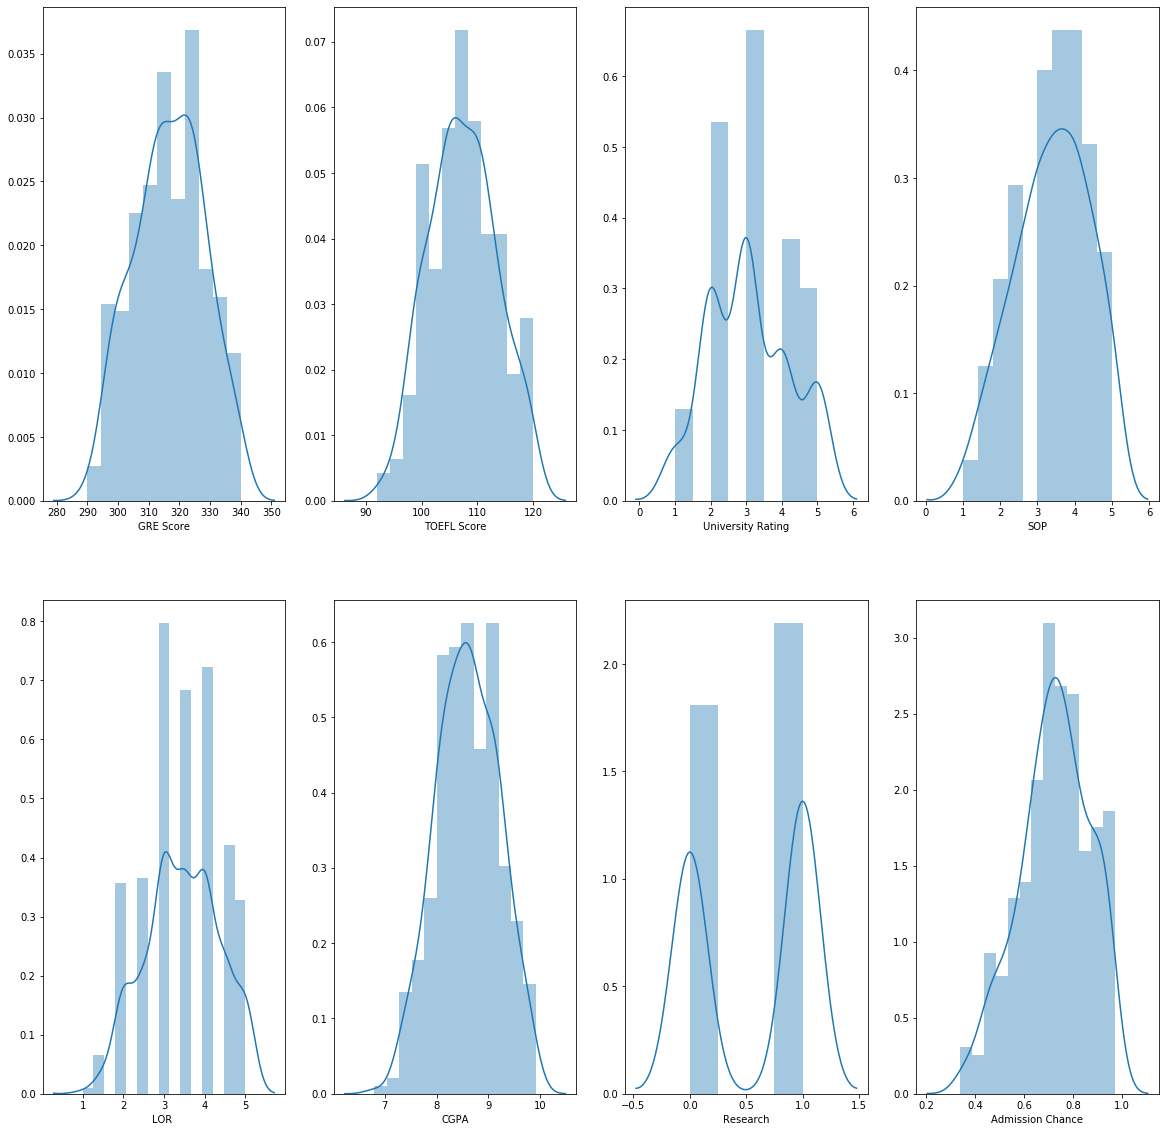

In [15]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 20))

for column_header in column_headers:
    plt.subplot(2, 4, i)
    sns.distplot(admission_df[column_header])
    i = i + 1

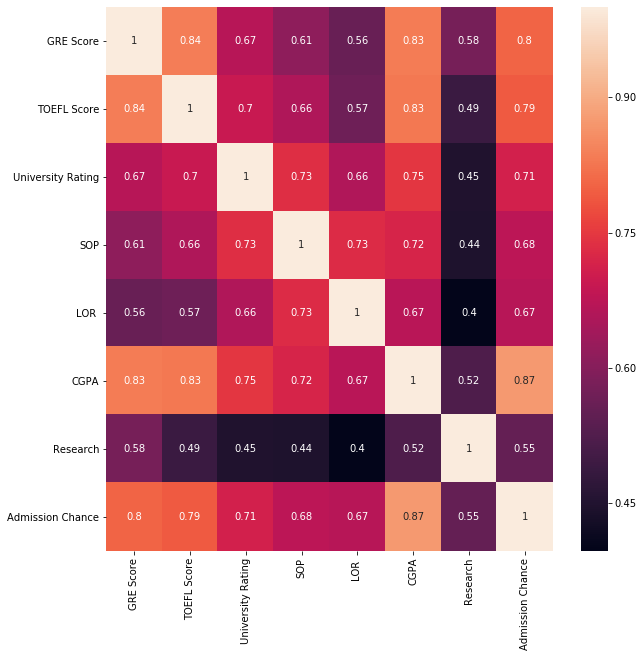

In [16]:
plt.figure(figsize = (10, 10))
sns.heatmap(admission_df.corr(), annot=True)

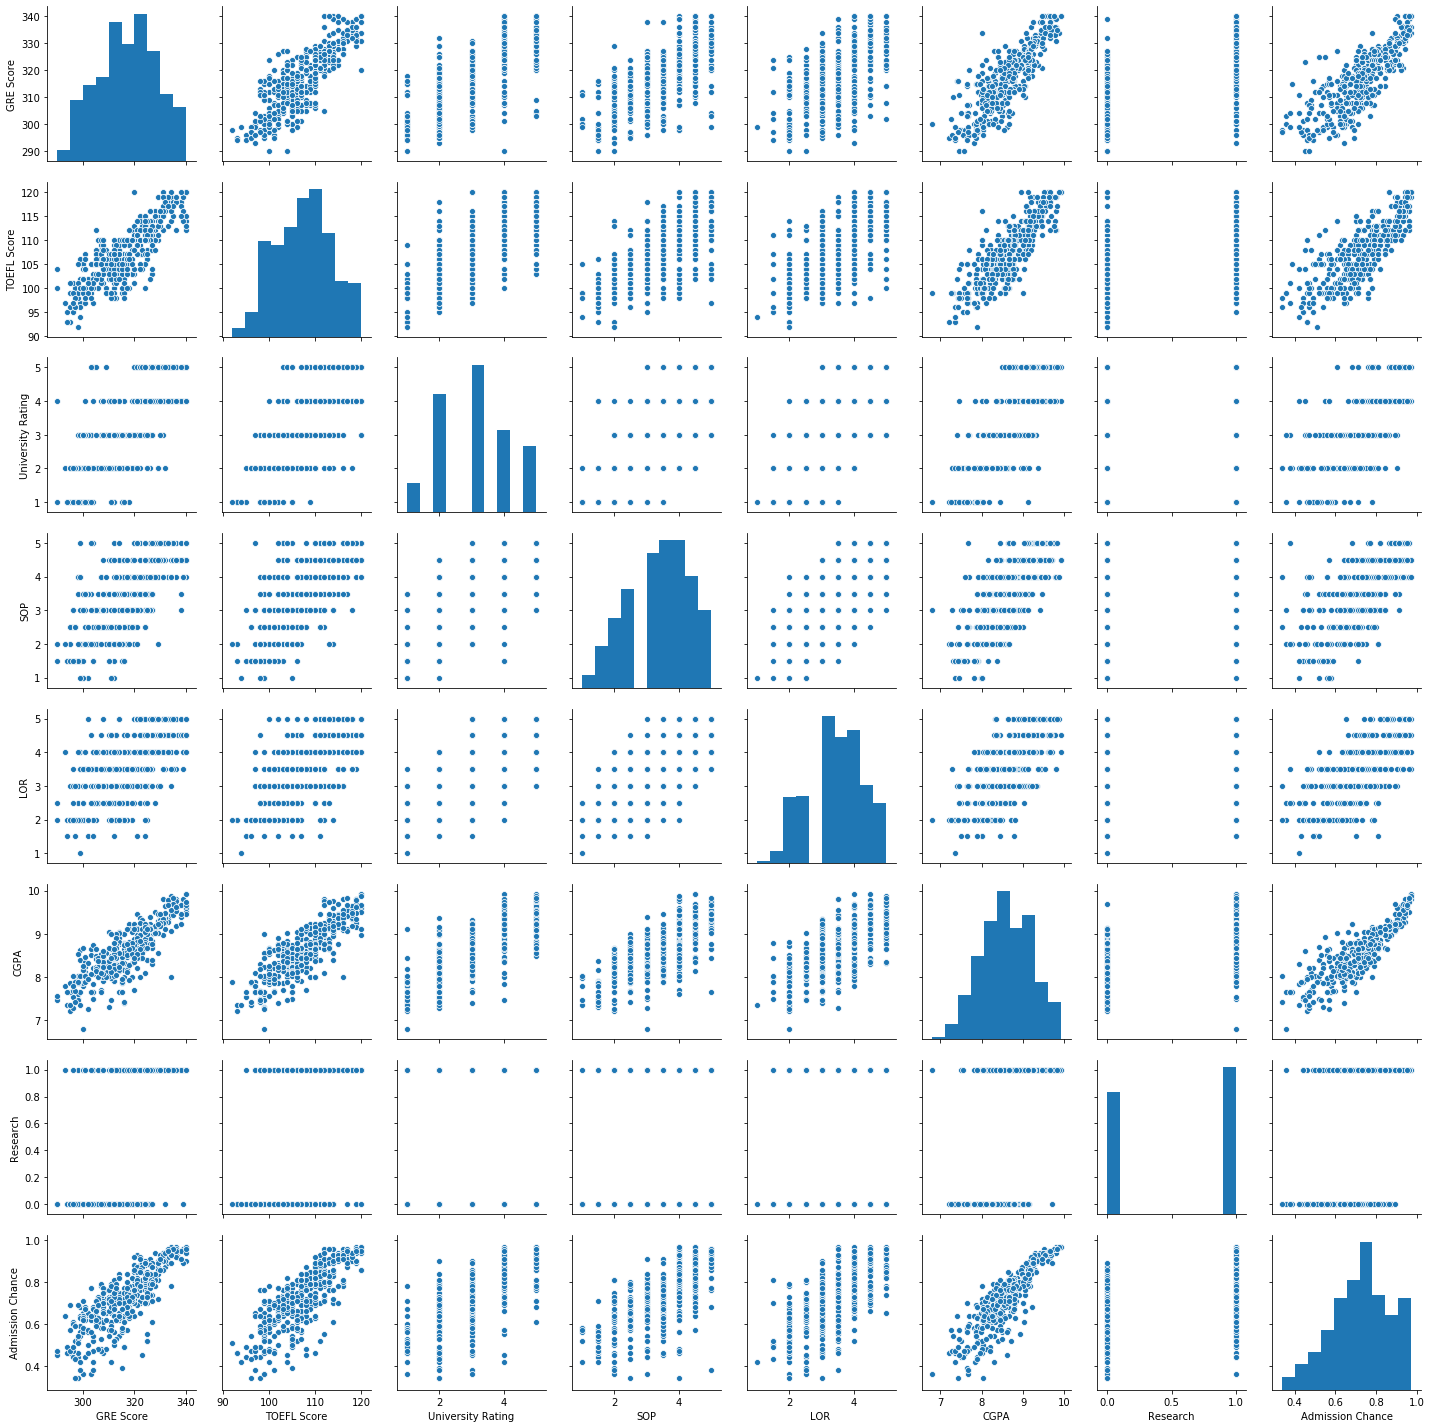

In [17]:
sns.pairplot(admission_df)

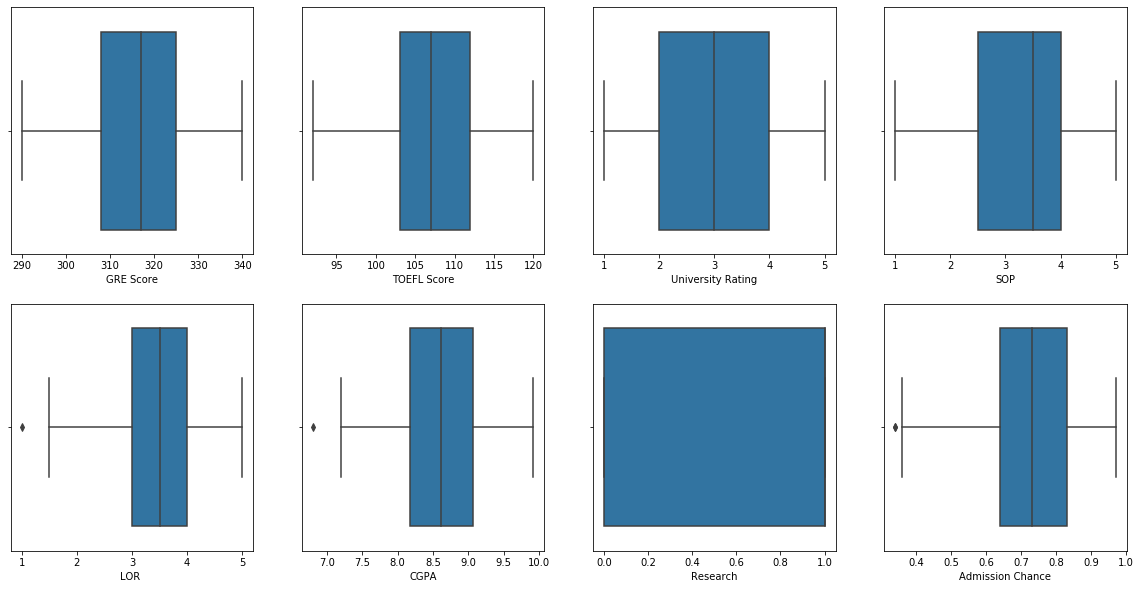

In [18]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 10))

for column_header in column_headers:
    plt.subplot(2, 4, i)
    sns.boxplot(admission_df[column_header])
    i = i + 1

## Creating Training and Testing data

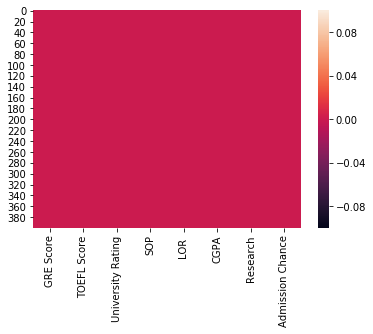

In [21]:
sns.heatmap(admission_df.isnull())

In [19]:
y = admission_df['Admission Chance']
X = admission_df.drop(columns = ['Admission Chance'], axis = 1)

In [22]:
X.shape

(400, 7)

In [23]:
y.shape

(400,)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
X_train.shape

(320, 7)

In [28]:
y_train.shape

(320,)

In [29]:
X_test.shape

(80, 7)

In [30]:
y_test.shape

(80,)

## Training the Model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regressor = LinearRegression(fit_intercept=True)

In [33]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print('Linear Model coef (m)', regressor.coef_)
print('Linear Model coef (b)', regressor.intercept_)

Linear Model coef (m) [ 0.00207128  0.00195523  0.00657193 -0.00472847  0.02118445  0.12463177
  0.02414366]
Linear Model coef (b) -1.3047138300824122


## Evaluating the Model

In [35]:
y_predict = regressor.predict(X_test)

In [36]:
y_predict

array([0.69791327, 0.69343926, 0.77882728, 0.61577391, 0.72281999,
       0.60286273, 0.7067783 , 0.64104331, 0.87037545, 0.91874738,
       0.53830841, 0.88537227, 0.70839345, 0.45744365, 0.85464724,
       0.62329657, 0.63034415, 0.81411912, 0.58479826, 0.73198733,
       0.8755188 , 0.8436008 , 0.65964574, 0.45723204, 0.78390781,
       0.58302231, 0.49932541, 0.64153708, 0.88778116, 0.64950902,
       0.64065401, 0.74057509, 0.74268991, 0.55702869, 0.78303581,
       0.77159575, 0.65140153, 0.86244822, 0.63038997, 0.92925287,
       0.72728695, 0.67164181, 0.70967833, 0.80792068, 0.8242496 ,
       0.6540426 , 0.56311848, 0.69211512, 0.60750179, 0.60172386,
       0.67514274, 0.80138513, 0.65205933, 0.87968402, 0.72302425,
       0.75457701, 0.70602419, 0.73465988, 0.75784394, 0.82956036,
       0.77359675, 0.47343091, 0.63752277, 0.52286953, 0.84258874,
       0.82142312, 0.73664582, 0.86699812, 0.76933952, 0.75453984,
       0.59900479, 0.82915301, 0.82822468, 0.60736795, 0.93236

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

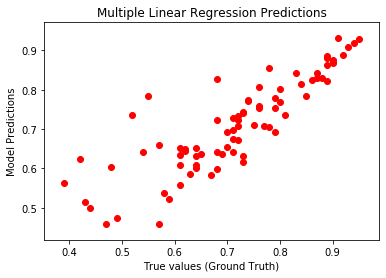

In [38]:
plt.scatter(y_test, y_predict, color='r')
plt.ylabel('Model Predictions')
plt.xlabel('True values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

In [39]:
k = X_test.shape[1]
n = len(X_test)

In [40]:
k

7

In [41]:
n

80

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean(np.abs((y_test-y_predict)/ y_test))*100

In [43]:
print('RMSE = ', RMSE, '\nMSE = ',MSE ,'\nMAE = ',MAE ,'\nr2_score = ',r2 ,'\nadj_r2 = ',adj_r2 ,'\nMAPE = ',MAPE )

RMSE =  0.069 
MSE =  0.004805156569785206 
MAE =  0.05008754843817964 
r2_score =  0.7355078738145218 
adj_r2 =  0.7097933615464891 
MAPE =  8.09002789062066


## Retrain and Visualize the Result

In [46]:
X = admission_df[['GRE Score', 'TOEFL Score']]
y = admission_df['Admission Chance']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_predict = regressor.predict(X_test)

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

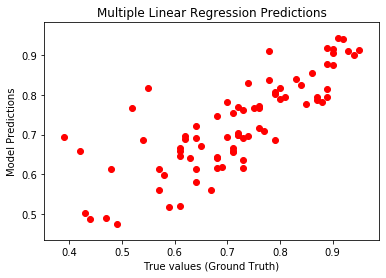

In [50]:
plt.scatter(y_test, y_predict, color='r')
plt.ylabel('Model Predictions')
plt.xlabel('True values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean(np.abs((y_test-y_predict)/ y_test))*100

In [52]:
print('RMSE = ', RMSE, '\nMSE = ',MSE ,'\nMAE = ',MAE ,'\nr2_score = ',r2 ,'\nadj_r2 = ',adj_r2 ,'\nMAPE = ',MAPE )

RMSE =  0.083 
MSE =  0.006816077266875634 
MAE =  0.05892974903773844 
r2_score =  0.6248199736307392 
adj_r2 =  0.5883441377337277 
MAPE =  9.550561881366852


## Visualize the Result

In [63]:
from mpl_toolkits.mplot3d import Axes3D
x_surf, y_surf = np.meshgrid( np.linspace(admission_df['GRE Score'].min(), admission_df['GRE Score'].max(), 100), np.linspace(admission_df['TOEFL Score'].min(), admission_df['TOEFL Score'].max(), 100))

In [64]:
onlyX = pd.DataFrame({'GRE Score':x_surf.ravel(), 'TOEFL Score':y_surf.ravel()}) 

In [65]:
fittedY = regressor.predict(onlyX)

In [66]:
fittedY = fittedY.reshape(x_surf.shape)

Text(0.5, 0, 'Admission Chance')

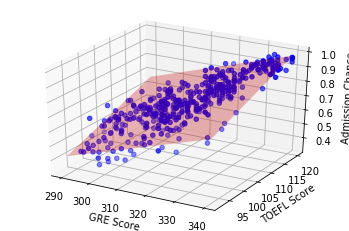

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(admission_df['GRE Score'], admission_df['TOEFL Score'], admission_df['Admission Chance'], c='blue')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Admission Chance')